### Import

In [1]:
# PyTorch
import torch
from torch import optim
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader, random_split

# Numpy
import numpy as np

# Plot
import matplotlib.pyplot as plt


# User-Defined Class
from model import sin_ml, sin_qml
from trainer import trainer

%matplotlib inline


### Data 생성

In [3]:
# 데이터 생성
num_data = 20000  # 총 데이터 개수
batch_size = 128  # 배치 크기

# 입력 데이터 생성 (0부터 2π 사이의 값)
x_data = torch.rand(num_data, 1) * 2 * torch.pi  # (20000, 1) shape로 생성
y_data = torch.sin(x_data)  # sin 함수로 출력 생성 (20000, 1)

# 텐서 데이터셋 생성
dataset = TensorDataset(x_data, y_data)

# Train/Test set 분할 (80%/20% 비율)
train_size = int(0.8 * num_data)
test_size = num_data - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 배치 예시 출력
x_batch, y_batch = next(iter(train_loader))
print("Example batch x:", x_batch.shape)  # Expected: [128, 1]
print("Example batch y:", y_batch.shape)  # Expected: [128, 1]


Example batch x: torch.Size([128, 1])
Example batch y: torch.Size([128, 1])


### 2-dim vector Model Comparison

- ml : 2-dim hidden layer, 3 layers

- qml : 1 qubit / 2 layers

#### quantum

In [8]:
model3 = sin_qml(num_qubit=1, num_layer=2)
trainer3 = trainer(model3, train_loader=train_loader, test_loader=train_loader)

100%|██████████| 100/100 [00:11<00:00,  8.36it/s]


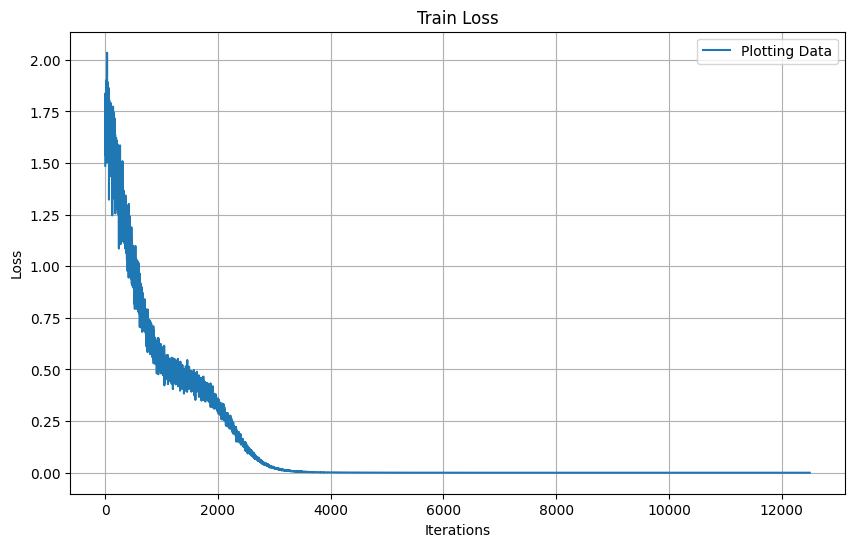

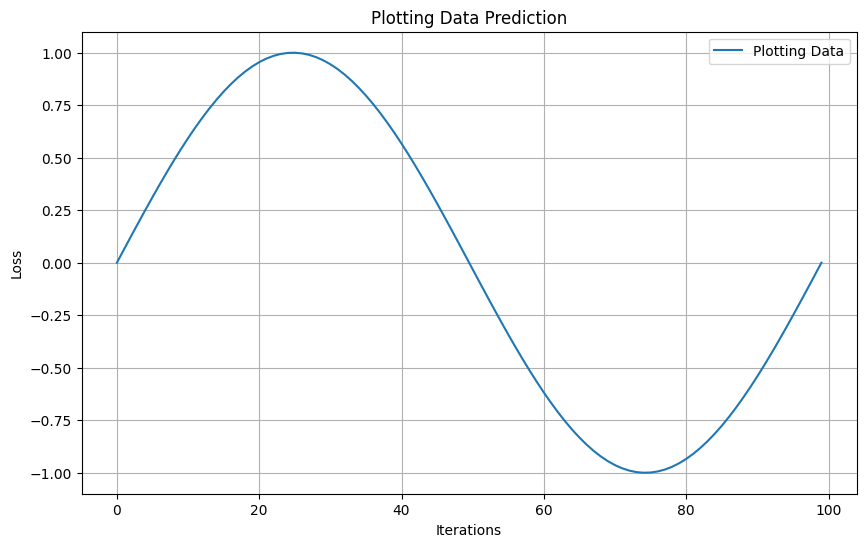

In [9]:
trainer3.train(100, True)
trainer3.plot_pred()

#### ml

100%|██████████| 100/100 [00:04<00:00, 20.12it/s]


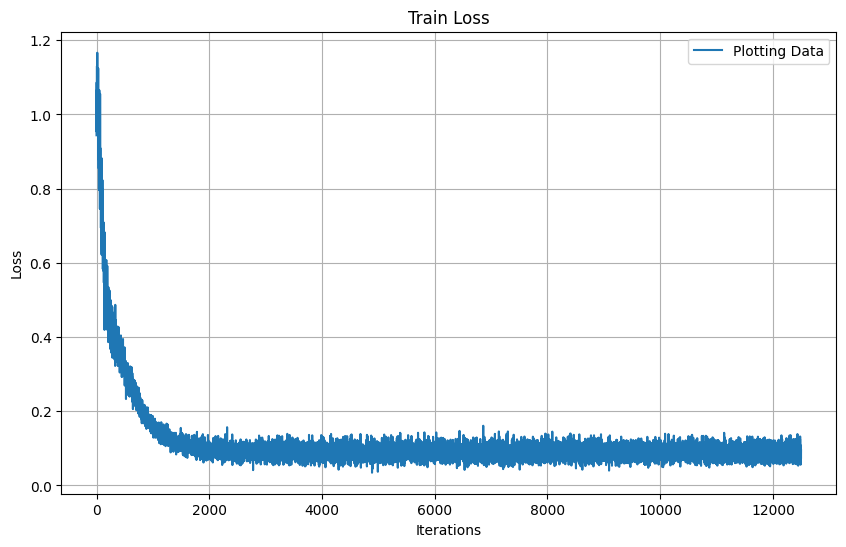

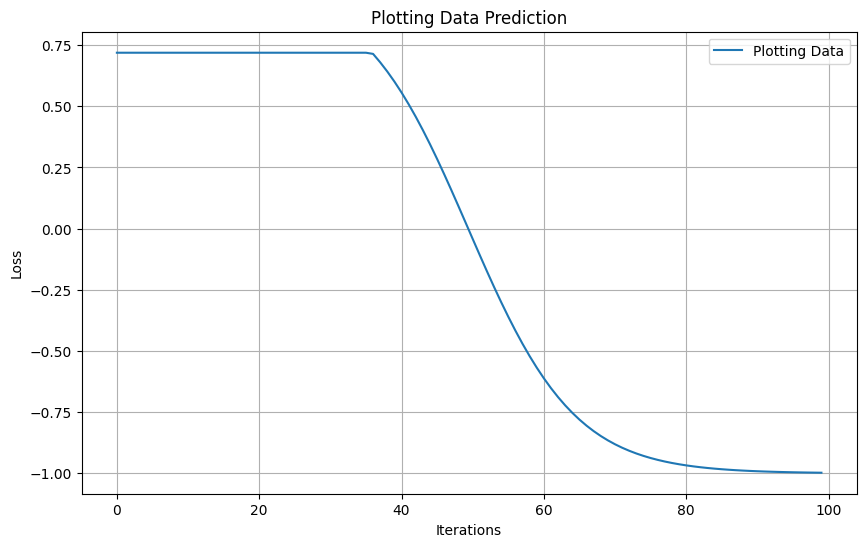

In [10]:
model4 = sin_ml(hidden_dim=2, num_layer=3)
trainer4 = trainer(model4, train_loader=train_loader, test_loader=train_loader)
trainer4.train(epochs=100, chk=True)
trainer4.plot_pred()

### 4-dim vector Model Comparison
- ml : 4-dim hidden layer, 4 layers

- qml : 2 qubits, 3 layers

- layer 수 더 적을 시 결과 X

100%|██████████| 100/100 [00:27<00:00,  3.68it/s]


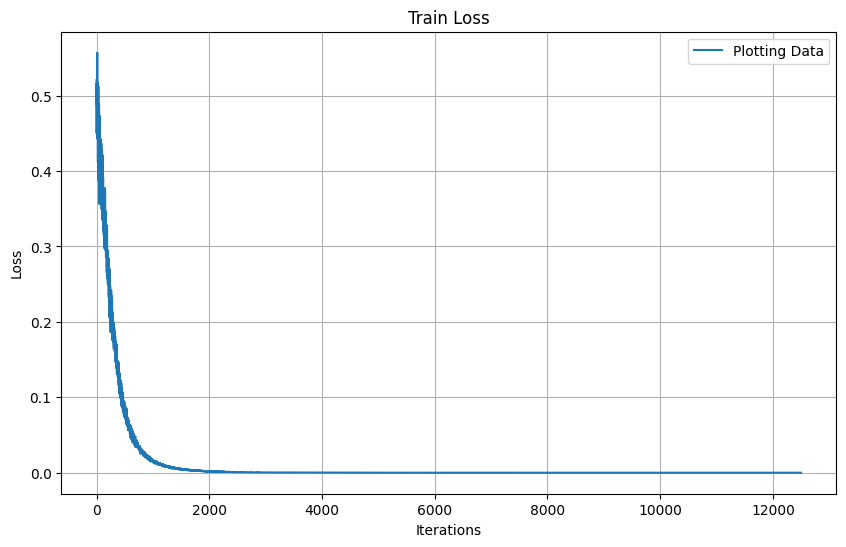

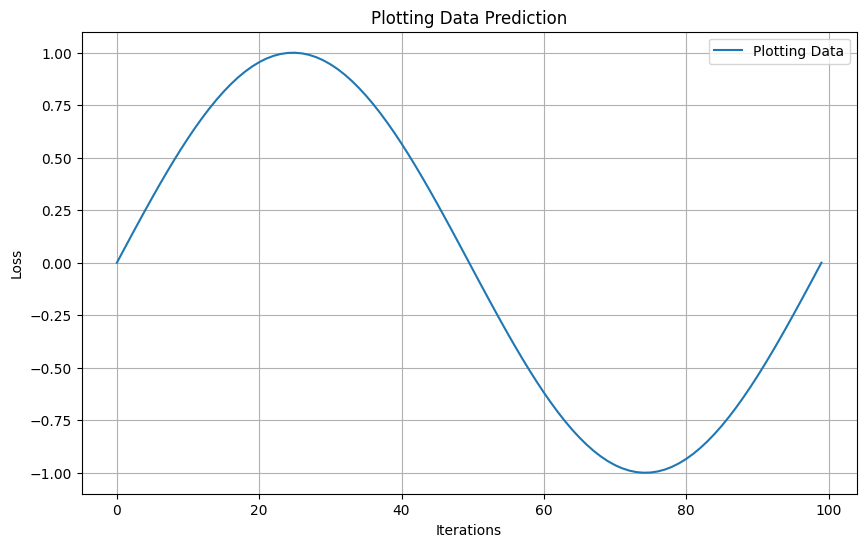

In [18]:
model5 = sin_qml(num_qubit=2, num_layer=3)
trainer5 = trainer(model5, train_loader=train_loader, test_loader=train_loader)
trainer5.train(epochs=100, chk=True)
trainer5.plot_pred()

100%|██████████| 100/100 [00:05<00:00, 18.44it/s]


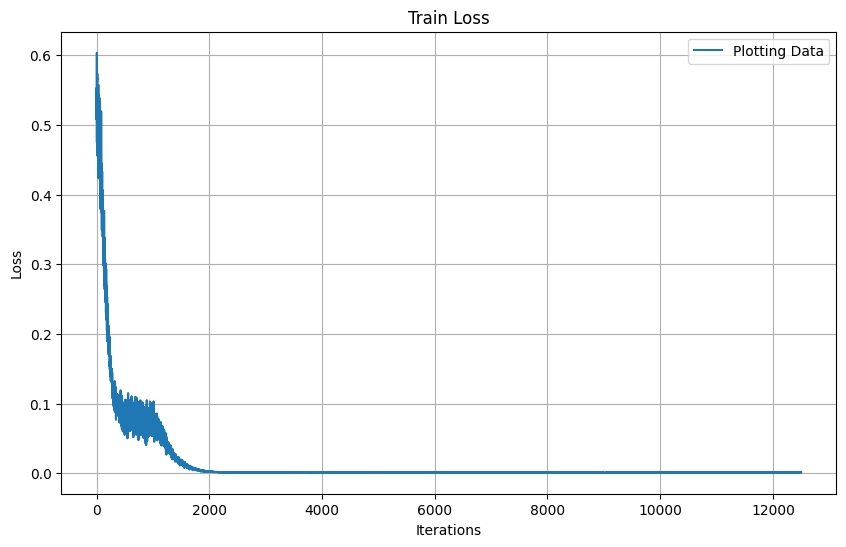

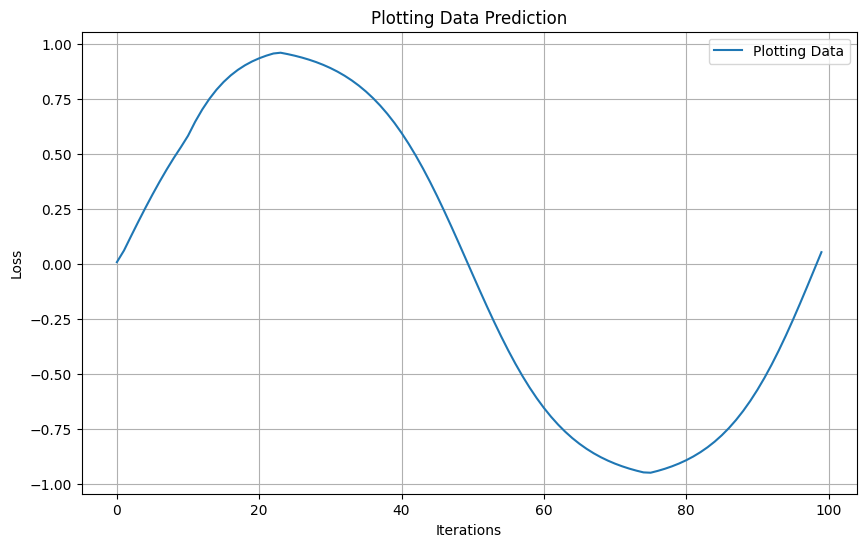

In [19]:
model7 = sin_ml(hidden_dim=4, num_layer=4)
trainer7 = trainer(model7, train_loader=train_loader, test_loader=train_loader)
trainer7.train(epochs=100, chk=True)
trainer7.plot_pred()